# Descriptive Statistics

In [2]:
import os, sys
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display, Latex

from scipy.stats import chi2, t, f

In [3]:
# =================================
# Add the parent directory to the Python path
def get_parent_dir():
    try:
        # Works when running a script
        current_dir = os.path.dirname(__file__)
    except NameError:
        # Works in notebooks / REPL
        current_dir = os.getcwd()
    return os.path.abspath(os.path.join(current_dir, '..'))

parent_dir = get_parent_dir()
sys.path.append(parent_dir)
# =================================
print(parent_dir)

/Users/xdu4/Documents/Duxiuxia/source_code_repository/github_duxiuxia-bioinformatics/teach_machine_learning_and_ai/src/teaching


In [4]:
# import data
in_file_name = 'NHANES_PFAS_J_2017-2018.csv'
in_file_full_name = os.path.join(parent_dir, 'data', in_file_name)
data_df = pd.read_csv(in_file_full_name)
print(data_df.shape)
print(data_df.columns)

(2133, 20)
Index(['SEQN', 'WTSB2YR', 'LBXPFDE', 'LBDPFDEL', 'LBXPFHS', 'LBDPFHSL',
       'LBXMPAH', 'LBDMPAHL', 'LBXPFNA', 'LBDPFNAL', 'LBXPFUA', 'LBDPFUAL',
       'LBXNFOA', 'LBDNFOAL', 'LBXBFOA', 'LBDBFOAL', 'LBXNFOS', 'LBDNFOSL',
       'LBXMFOS', 'LBDMFOSL'],
      dtype='object')


## Descriptive statistics

Sample mean
$$
\bar{X} = \frac{\sum_{i=1}^n x_i}{n}
$$
Sample mean reflects central tendency of the data.


In [5]:
variable_name = 'LBXPFDE'

In [6]:
x_bar = data_df[variable_name].mean()
print(x_bar)

0.2733333333333333


Sample median: the middle value in a dataset when arranged in order, separating the higher half from the lower half.

In [7]:
sample_median = data_df[variable_name].median()
print(sample_median)

0.2


Sample variance
$$
s^2 = \frac{\sum_{i=1}^n (x_i - \bar{X})^2}{n-1}
$$
Sample variance reflects deviation of the data from the mean.

In [8]:
s_squared = data_df[variable_name].var()
print(s_squared)

0.12979795988934953


Sample standard deviation
$$
s = \sqrt{s}
$$
Sample standard deviation reflects deviation of the data from the mean and has the same unit as $x_i$.

In [9]:
s = data_df[variable_name].std()
print(s)

0.360274839378702


Range = max(x) - min(x)

In [10]:
sample_range = data_df[variable_name].max() - data_df[variable_name].min()
print(sample_range)

6.83


Distribution: can be visualized as a histogram, boxplot, or density plot

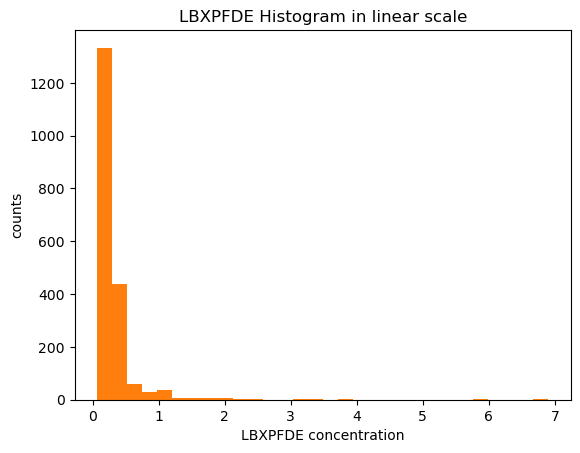

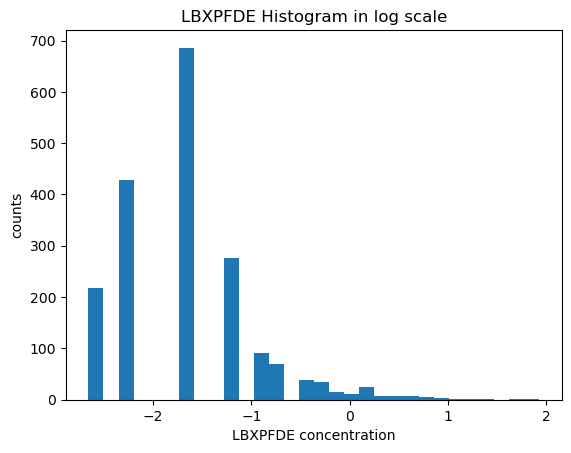

In [11]:
# Histogram in linear scale
plt.hist(data_df[variable_name].dropna(), bins=30)

plt.hist(data_df[variable_name].dropna(), bins=30)
plt.xlabel(f'{variable_name} concentration')
plt.ylabel(f'counts')
plt.title(f'{variable_name} Histogram in linear scale')
plt.show()

# Histogram in log scale
plt.hist(np.log(data_df[variable_name].dropna()), bins=30)
plt.xlabel(f'{variable_name} concentration')
plt.ylabel(f'counts')
plt.title(f'{variable_name} Histogram in log scale')
plt.show()

Boxplot or box-and-whisker plot

It summarizes a dataset's distribution, especially when you want to compare groups or spot outliers quickly. Each boxplot is built from five key numbers:

- Minimum
- Q1 (1st quartile): 25 of data below this
- Median (Q2): middle value
- Q3 (3rd quartile): 75 of data below this
- Maximum


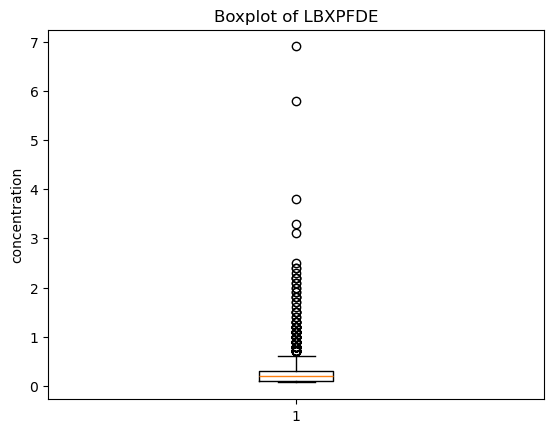

In [12]:
plt.boxplot(data_df[variable_name].dropna())
plt.ylabel('concentration')
plt.title(f'Boxplot of {variable_name}')
plt.show()

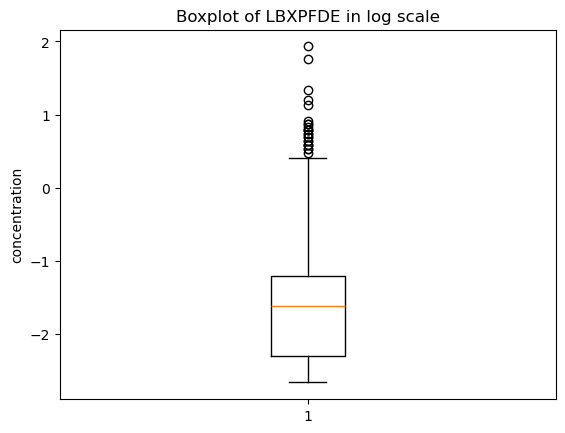

In [13]:
plt.boxplot(np.log(data_df[variable_name].dropna()))
plt.ylabel('concentration')
plt.title(f'Boxplot of {variable_name} in log scale')
plt.show()

Parts of a boxplot.

- The box
    - Span from Q1 to Q3
    - Contains the middle 50% of the data
    - Its height = IQR (Interquartile Range): IQR = Q3 - Q1
- The line in the box is the median
- The whiskers extend to the smallest and largest values within Q1 - 1.5 * IQR and Q3 + 1.5 * IQR
- The dots beyond whiskers are outliers that are unusually small or large values.

How to interpret a boxplot?

- Center
    - Median tells us where the data is centered
- Spread
    - Big box --> data is more variable
    - Small box --> data is more consistent
- Skewness
    - Median closer to bottom of box --> right-skewed
    - Median closer to the top of box --> left-skewed
- Outliers
    - Points far away from the box --> potential errors, rare events, or special cases


Density plots: Also called a KDE plot, shows the smoothed distribution of the data

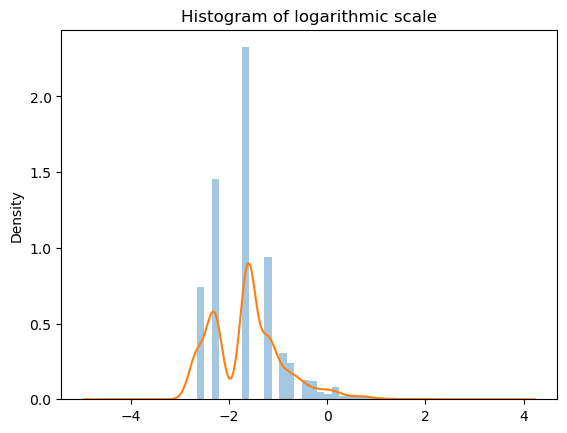

In [14]:
x = np.log(data_df[variable_name].dropna())
plt.hist(x, bins=30, density=True, alpha=0.4)
x.plot(kind='density')
plt.title('Histogram of logarithmic scale')
plt.show()

Mean-centering: Subtract the mean from the data. The sample mean of the mean-centered data is zero.

In [15]:
mean_centered_x = data_df[variable_name] - data_df[variable_name].mean()
print(mean_centered_x.mean())

2.164042805904919e-17
